In [206]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from tqdm import tqdm

In [199]:
def show(img):
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)

In [200]:
model = tf.keras.models.load_model('model.hdf5')
labels = ['child', 'adult']

In [212]:
src = cv2.imread('adult.jpg')
xs = src.reshape((1, 200, 200, 3))
xs = xs.astype(np.float32)
target = tf.constant([[0.0, 1.0]], dtype=tf.float32)

In [213]:
nsamples=100
stdev_spread = 0.02
stdev = stdev_spread * (np.max(xs) - np.min(xs))
noise = np.random.normal(0, stdev, xs.shape)
total_gradients = np.zeros_like(xs)
for i in tqdm(range(nsamples)):
    noise = np.random.normal(0, stdev, xs.shape)
    x_plus_noise = xs + noise
    txs = tf.constant(x_plus_noise, dtype=tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(txs)
        ys = model(txs)
        loss = tf.keras.losses.categorical_crossentropy(target, ys)
    grad = tape.gradient(loss, txs)
    total_gradients += (grad * grad)
gradients = total_gradients / nsamples
gradients = gradients[0]

100%|██████████| 100/100 [00:17<00:00,  5.63it/s]


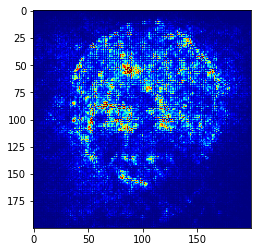

In [214]:
percentile = 99
image_2d = np.sum(np.abs(gradients), axis=2)
# 上位1パーセントの値
vmax = np.percentile(image_2d, percentile)
# 最小値
vmin = np.min(image_2d)
# 正規化
normalized = (image_2d - vmin) / (vmax - vmin)
v = np.clip(normalized, 0, 1)
plt.imshow(v, cmap='jet')

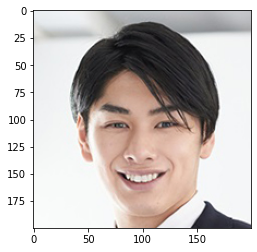

In [215]:
show(src)